<h1>DAVE3625 Oblig. 2 - Machine Learning</h1>

In [1]:
%matplotlib inline

import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
url = "https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment2-machinelearning/TSLA.csv"
df = pd.read_csv(url)

# Source: Slack channel for this subject.
df['Date'] = pd.to_datetime(df['Date'])

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2840,2021-10-08,796.210022,796.380005,780.909973,785.489990,785.489990,16711100
2841,2021-10-11,787.650024,801.239990,785.500000,791.940002,791.940002,14200300
2842,2021-10-12,800.929993,812.320007,796.570007,805.719971,805.719971,22020000
2843,2021-10-13,810.469971,815.409973,805.780029,811.080017,811.080017,14120100


<h4>Removing excessive columns that isn't necessary for our assignment.</h4>

In [3]:
df = df.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'])
df

,Date,Adj Close
0,2010-06-29,4.778000
1,2010-06-30,4.766000
2,2010-07-01,4.392000
3,2010-07-02,3.840000
4,2010-07-06,3.222000
...,...,...
2840,2021-10-08,785.489990
2841,2021-10-11,791.940002
2842,2021-10-12,805.719971
2843,2021-10-13,811.080017


<h4>Visualization of the correlation between 'Date' and 'Adj Close'.</h4>

<AxesSubplot:xlabel='Date'>

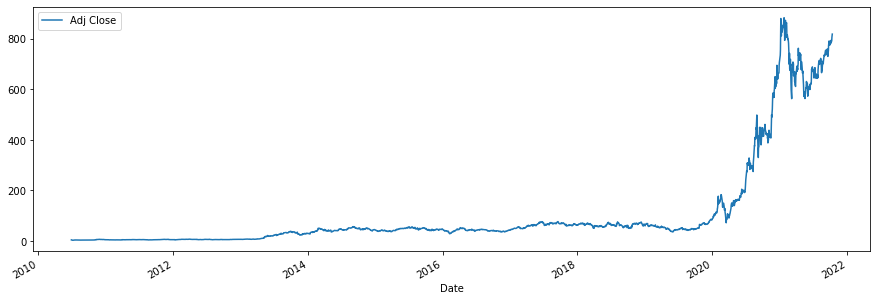

In [4]:
df.plot(figsize=(15,5), x = 'Date', y = 'Adj Close')

<h4>Changing datetime objects to type int in order to make it possible to train a model.</h4>
<h4>The dates are now changed to the "xth day after 01.01.01" (Slack channel).</h4>

In [5]:
# Source: Slack channel for this subject.
df['Date']=df['Date'].map(dt.datetime.toordinal)

<h4>Preparing the data by setting the test size to 20%.</h4>

In [6]:
# Setting the test size to 20%
X_train, X_test, y_train, y_test = train_test_split(df[['Date']], df[['Adj Close']], test_size=.2)

<h4>Preparing the data by splitting it into a testing set and a training set.</h4>

In [7]:
# Test set
print(X_test.describe())

                Date
count     569.000000
mean   736097.968366
std      1162.414244
min    733952.000000
25%    735106.000000
50%    736142.000000
75%    737077.000000
max    738074.000000


In [8]:
# Training set
print(X_train.describe())

                Date
count    2276.000000
mean   735994.019772
std      1199.014996
min    733953.000000
25%    734940.750000
50%    735990.500000
75%    737027.250000
max    738077.000000


<h4>Creating a model for training, plotting and testing.</h4>
<h4>Visualization of the prediction and data.</h4>
<h4>In the visualization the blue points are based on the data, and the red line represents the prediction.</h4>

In [9]:
# Training model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
Y_pred = linear_regressor.predict(X_train)

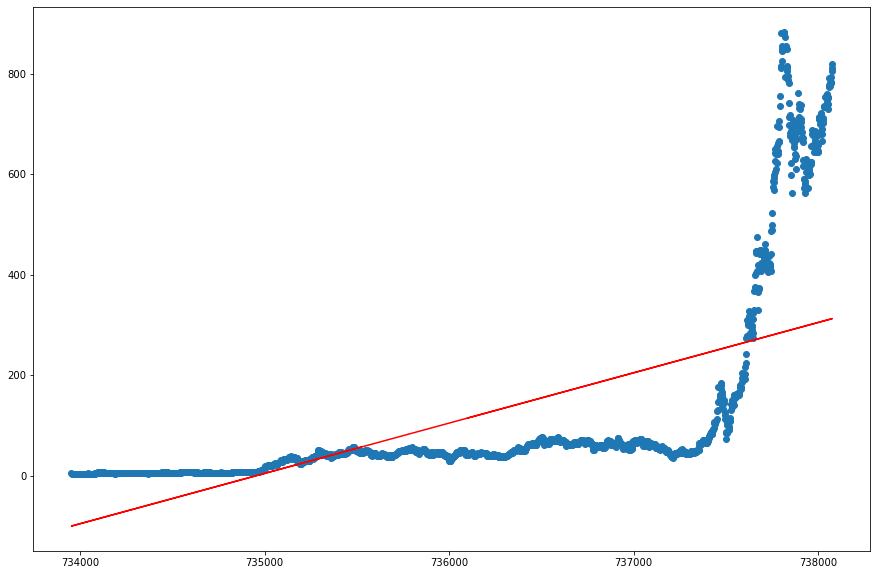

MSE = 20618.974317876276


In [10]:
# Plotting model
plt.figure(figsize=(15,10))   
# Source: https://github.com/umaimehm/Intro_to_AI_2021/tree/main/Lab4
plt.scatter(X_train, y_train)   
plt.plot(X_train, Y_pred, color='red') 
plt.show()                               
print( "MSE = "+str(metrics.mean_squared_error(y_train,Y_pred))) 

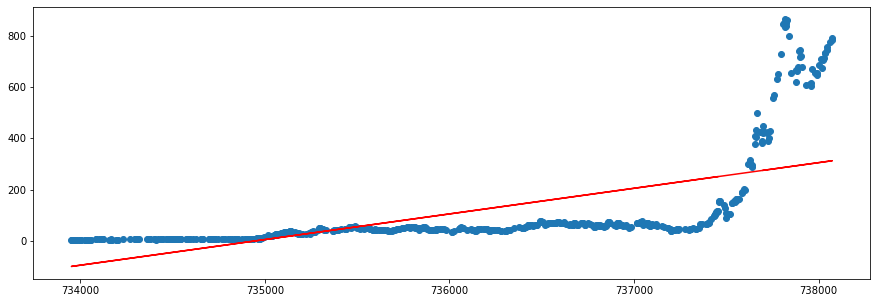

MSE = 22444.686184611015


In [11]:
# Testing model
# Source: https://github.com/umaimehm/Intro_to_AI_2021/tree/main/Lab4
Y_pred = linear_regressor.predict(X_test)

# Plotting test model
plt.figure(figsize=(15,5))
plt.scatter(X_test, y_test)
plt.plot(X_test, Y_pred, color='red')
plt.show()
print( "MSE = "+str(metrics.mean_squared_error(y_test,Y_pred)))

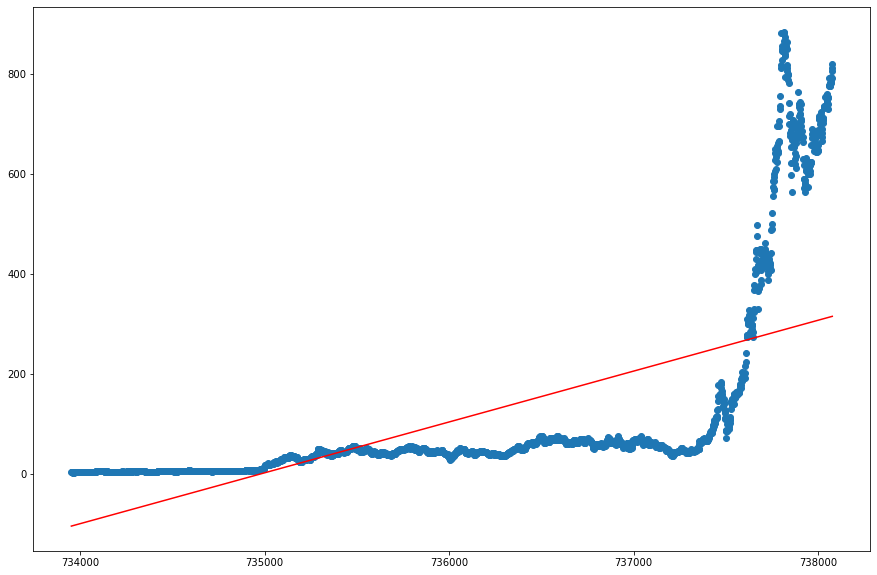

MSE = 20981.160786283373


In [12]:
# Dette ble gjort i lab4, men vet ikke om det er relevant for vår oppgave.
X = pd.DataFrame(df['Date'])
Y = pd.DataFrame(df['Adj Close'])
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)
plt.figure(figsize=(15,10))
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()
print( "MSE = "+str(metrics.mean_squared_error(Y, Y_pred)))